## Netflix Exploratory Data Analysis

#### 1. Import Libraries, Import DataFrame, and Initial Overview

In [1]:
# Data processing, CSV file I/O
import pandas as pd

#Linear Algebra
import numpy as np

# Visualization Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

import seaborn as sns

# DateTime Libraries
from time import strptime
import datetime as dt

# To separate and count multiple values in one cell
from collections import Counter

# String Manipulation
import string
import re

# Ignore Filter Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import DataFrame
netflix = pd.read_csv("netflix_titles.csv")

#View top 5 rows to confirm DataFrame was imported
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Findings** <br>
- type: Movie or TV Show
- country: has multiple countries listed in a single cell
    - Split multiple countries to count
- date_added: Month/Day/Year format
    - Need to change Month to datetime value
    - Split Month/Day/Year
- rating: has separate ratings for Movie vs TV Show
- duration: Movie is in minutes and TV Show is in seasons
    - Split duration between minutes vs seasons
- listed_in: has multiple genres listed in single cell
    - Split multiple genres to count

In [3]:
# Review number of columns, number of rows, and data type of each column
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Findings** <br>
- There are 12 columns and 8807 rows.
- Column "release_year" is data type 'int64' while the rest are 'object' (string)

In [4]:
# Number of unique values for each column.
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [5]:
# How many NULL Values does each column have?
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# What is the percentage of NULL Values for each column?
for i in netflix.columns:
    null_rate = netflix[i].isna().sum() / len(netflix) * 100 
    print("{} null rate: {}%".format(i,round(null_rate,2)))

show_id null rate: 0.0%
type null rate: 0.0%
title null rate: 0.0%
director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
release_year null rate: 0.0%
rating null rate: 0.05%
duration null rate: 0.03%
listed_in null rate: 0.0%
description null rate: 0.0%


**Findings** <br>
<br>
We must keep the following in mind when performing EDA
- Director column has almost 30% missing data
- Cast column has almost 10% missing data
- Date Added column has almost 10% missing data

## 2. Clean Data
2a. Fill in NULL Values for director, cast, and country columns <br>
2b. Fill in NULL Values for date_added, rating, and duration columns <br>
2c. Split date_added column to separate Day, Month, Year <br>

In [7]:
# 2a. Fill in NULL Values for director, cast, and country columns

# Fill in NULL Values with "No Data" for all three columns
netflix["director"].fillna("No Data", inplace = True)
netflix["cast"].fillna("No Data", inplace = True)
netflix["country"].fillna("No Data", inplace = True)

#We should have 0 NULL Values for director, cast, and country
netflix.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [8]:
'''
The following ratings were found on IMDB
13TH: A Conversation with Oprah Winfrey & Ava DuVernay - TV-PG
Gargantia on the Verdurous Planet - TV-14
Little Lunch - TV-MA
My Honor Was Loyalty - PG-13
'''
netflix.loc[netflix["title"] == "13TH: A Conversation with Oprah Winfrey & Ava DuVernay", "rating"] = "TV-PG"
netflix.loc[netflix["title"] == "Gargantia on the Verdurous Planet", "rating"] = "TV-14"
netflix.loc[netflix["title"] == "Little Lunch", "rating"] = "TV-G"
netflix.loc[netflix["title"] == "My Honor Was Loyalty", "rating"] = "PG-13"

# We should have 0 NULL Values after updating the ratings
netflix.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [9]:
# Show all NULL Values for the duration column
netflix[netflix["duration"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [10]:
# We can see that the duration for the 3 films are incorrectly placed in the rating column

# We will need to update both the rating and duration columns for these films
netflix.loc[netflix["title"] == "Louis C.K. 2017", "duration"] = "74 min"
netflix.loc[netflix["title"] == "Louis C.K.: Hilarious", "duration"] = "84 min"
netflix.loc[netflix["title"] == "Louis C.K.: Live at the Comedy Store", "duration"] = "66 min"

netflix.loc[netflix["title"] == "Louis C.K. 2017", "rating"] = "TV-MA"
netflix.loc[netflix["title"] == "Louis C.K.: Hilarious", "rating"] = "TV-MA"
netflix.loc[netflix["title"] == "Louis C.K.: Live at the Comedy Store", "rating"] = "TV-MA"

# We should have 0 NULL Values after updating the ratings and durations
netflix.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [11]:
# Since we found that some ratings were not correct, let us review the unique values in that column.
netflix["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [12]:
# Clean up ratings by replacing them with equivalent counterparts.
netflix["rating"] = netflix["rating"].replace({"G" : "TV-G"})
netflix["rating"] = netflix["rating"].replace({"PG" : "TV-PG"})
netflix["rating"] = netflix["rating"].replace({"PG-13" : "TV-14"})
netflix["rating"] = netflix["rating"].replace({"TV-Y7-FV" : "TV-Y7"})
netflix["rating"] = netflix["rating"].replace({"NC-17" : "TV-MA"})
netflix["rating"] = netflix["rating"].replace({"R" : "TV-MA"})
netflix["rating"] = netflix["rating"].replace({"UR" : "NR"})

netflix["rating"].unique()

array(['TV-14', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-G', 'NR'],
      dtype=object)

In [13]:
# Show all NULL Values for the date_added column
netflix[netflix["date_added"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,No Data,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,No Data,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,No Data,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,No Data,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,No Data,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,No Data,Igor Dmitriev,No Data,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,No Data,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,No Data,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,No Data,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,No Data,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [14]:
# We must keep in mind the correct DateTime format for the NULL Values in the date_added column
# Month Name, Day, Year

# We will set the NULL Values to a past date to indicate the data was missing.
# We can drop these values from the data set when we are exploring date_added only.
netflix["date_added"].fillna("January 1, 0001", inplace = True)

netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
# 2c. Split date_added column to separate Day, Month, Year

# Convert date_added to datetime format
netflix["date_added_dt"] = pd.to_datetime(netflix["date_added"])

# Create separate columns for Month Name, Month, Day, Year, and Day Name
netflix["date_added_month_name"] = netflix["date_added_dt"].dt.month_name()
netflix["date_added_month"] = netflix["date_added_dt"].dt.month
netflix["date_added_day"] = netflix["date_added_dt"].dt.day
netflix["date_added_year"] = netflix["date_added_dt"].dt.year
netflix["date_added_day_name"] = netflix["date_added_dt"].dt.weekday

netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_dt,date_added_month_name,date_added_month,date_added_day,date_added_year,date_added_day_name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,TV-14,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,September,9,25,2021,5
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,September,9,24,2021,4
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,September,9,24,2021,4


## 3. Exploratory Data Analysis

3a. Netflix Content: Movies vs TV Shows <br>
3b. What are the most common dates Movies and TV Shows are added to Netflix? <br>
3c. What are the most common release year of Movies and TV Shows? <br>
3d. What are the most common ratings for Movies and TV Shows? <br>
3e. What are the longest durations for Movies and TV Shows? <br>
3f. What are the most common countries creating Movies and TV Shows? <br>
3g. What are the most common genres of Movies and TV Shows? <br>
3h. What are the most common plots/themes of Movies and TV Shows? <br>

In [16]:
# 3a. Netflix Content: Movies vs TV Shows

# Create Movie df and TV Show df to analyze Netflix content by 'type'.
net_movie = netflix[netflix["type"] == "Movie"]
net_tv = netflix[netflix["type"] == "TV Show"]

# Show actual count of Movies vs TV Shows
display(netflix["type"].value_counts())

# Create Pie Chart of Movies vs TV Shows
net_type = netflix["type"].value_counts().reset_index()
net_type = net_type.rename(columns = {"type" : "count", "index" : "type"})

trace = go.Pie(labels=net_type["type"], values=net_type['count'], pull=[0.1, 0], marker=dict(colors=["#564d4d", "#b20710"]))
layout = go.Layout(title="Netflix Content: Movies vs TV Shows", height=500, width=500)
fig = go.Figure(data = [trace], layout = layout)

#Display Plot
iplot(fig)

Movie      6131
TV Show    2676
Name: type, dtype: int64

**Findings**

- Netflix content consists of more than 2X the amount of Movies than TV Shows.

In [17]:
# 3b. What are the most common dates Movies and TV Shows are added to Netflix?

# Create new columns for Day of the Week, Day of the Month, Month, and Year.
netflix['date_added_weekday'] = pd.DatetimeIndex(netflix['date_added']).weekday

netweekday = netflix["date_added_weekday"].value_counts()
netday = netflix["date_added_day"].value_counts().head(5)
netmonth = netflix["date_added_month"].value_counts().head(5)
netyear = netflix["date_added_year"].value_counts().head(5)

#Display data for each column in descending order.
display(netweekday, netday, netmonth, netyear)

4    2498
3    1396
2    1288
1    1197
0     861
5     816
6     751
Name: date_added_weekday, dtype: int64

1     2222
15     687
2      325
16     289
31     274
Name: date_added_day, dtype: int64

7     827
12    813
9     770
4     764
10    760
Name: date_added_month, dtype: int64

2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
Name: date_added_year, dtype: int64

In [49]:
# Create Heatmap of Netflix Content Added by Year grouped by Month
yearmonth = netflix[netflix.date_added_year >= 1].groupby('date_added_year').date_added_month.value_counts().to_frame()
yearmonth.columns = ['month_count']
yearmonth.reset_index(drop=False, inplace=True)
yearmonth = yearmonth.pivot(index='date_added_year', columns='date_added_month').month_count
yearmonth.style.background_gradient(cmap='Reds', vmin=0, vmax=200).format("{:.0f}")

date_added_month,1,2,3,4,5,6,7,8,9,10,11,12
date_added_year,,,,,,,,,,,,
2001,10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2008,1,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,1,nan
2010,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,nan
2011,nan,nan,nan,nan,1,nan,nan,nan,1,11,nan,nan
2012,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,1,1
2013,nan,nan,1,nan,nan,nan,nan,1,2,3,2,2
2014,2,2,nan,2,nan,1,1,1,1,4,4,6
2015,1,4,5,5,6,6,7,2,7,14,4,21


In [50]:
# Create Heatmap of Netflix Content Added by Year grouped by Day of the Month. All Months are added up.
yearmonthday = netflix[netflix.date_added_year >= 1].groupby('date_added_year').date_added_day.value_counts().to_frame()
yearmonthday.columns = ['day_count']
yearmonthday.reset_index(drop=False, inplace=True)
yearmonthday = yearmonthday.pivot(index='date_added_year', columns='date_added_day').day_count
yearmonthday.style.background_gradient(cmap='Reds', vmin=0, vmax=200).format("{:.0f}")

date_added_day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
date_added_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001,10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2008,1,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2010,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011,11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan
2012,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2013,4,1,nan,nan,nan,nan,nan,1,nan,nan,nan,1,nan,2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,nan,1
2014,2,nan,nan,nan,1,nan,1,nan,nan,1,1,2,nan,1,3,1,2,2,2,nan,2,nan,nan,2,nan,1,nan,nan,nan,nan,nan
2015,6,3,1,1,1,2,1,2,2,4,1,nan,3,3,10,4,4,3,nan,3,nan,8,3,nan,3,2,2,1,3,1,5


In [51]:
# Create Heatmap of Netflix Content Added by Year grouped by Day of the Week.  All Weeks added up.
yearweekday = netflix[netflix.date_added_year >= 1].groupby('date_added_year').date_added_weekday.value_counts().to_frame()
yearweekday.columns = ['weekday_count']
yearweekday.reset_index(drop=False, inplace=True)
yearweekday = yearweekday.pivot(index='date_added_year', columns='date_added_weekday').weekday_count
yearweekday.style.background_gradient(cmap='Reds', vmin=0, vmax=200).format("{:.0f}")

date_added_weekday,0,1,2,3,4,5,6
date_added_year,,,,,,,
2001,10,nan,nan,nan,nan,nan,nan
2008,1,1,nan,nan,nan,nan,nan
2009,nan,1,1,nan,nan,nan,nan
2010,1,nan,nan,nan,nan,nan,nan
2011,nan,2,nan,nan,nan,11,nan
2012,nan,1,1,nan,nan,1,nan
2013,2,1,nan,1,3,nan,4
2014,nan,3,2,2,13,1,3
2015,4,17,11,6,28,4,12


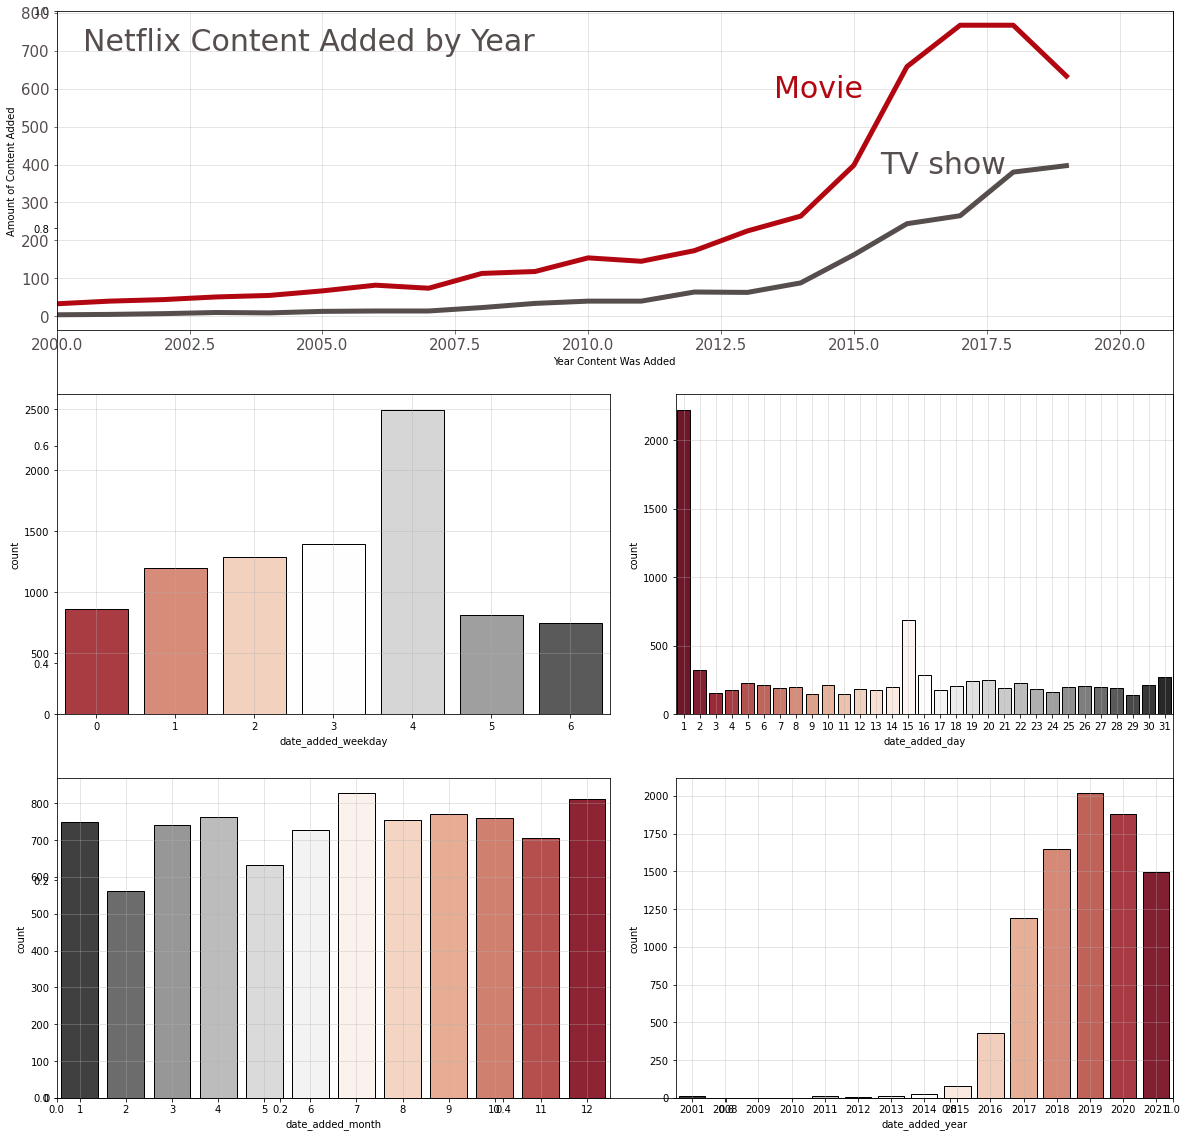

In [21]:
# Create graphs to show most common Day of the Week, Day of the Month, Month, and Year.

# Create separate variables to display Movies, TV Shows, and Total.
net_type_ry = netflix[['type','release_year']]
movie_type_ry = net_type_ry[net_type_ry['type'] =='Movie'].groupby('release_year')['type'].count()
tv_type_ry = net_type_ry[net_type_ry['type'] =='TV Show'].groupby('release_year')['type'].count()

# Create Plots.
fig, ax = plt.subplots(figsize=(20,20))
gs = gridspec.GridSpec(ncols=20, nrows=20, figure=fig)


ax1 = fig.add_subplot(gs[:6, :])
sns.lineplot(x= list(dict(tv_type_ry).keys())[:-2],y=list(dict(tv_type_ry).values())[:-2],lw=5, color='#564d4d',ax=ax1)
sns.lineplot(x= list(dict(movie_type_ry).keys())[:-2],y=list(dict(movie_type_ry).values())[:-2],lw=5, color='#b20710',ax=ax1)
ax1.text(s="Movie", x=2013.5, y= 600,color='#b20710', va="center",ha="left",fontsize=30)
ax1.text(s="TV show", x=2015.5, y= 400,color='#564d4d', va="center",ha="left",fontsize=30)
ax1.tick_params(axis='x', colors='#564d4d',labelsize=15) 
ax1.tick_params(axis='y', colors='#564d4d',labelsize=15)
ax1.set_xlabel("Year Content Was Added")
ax1.set_ylabel("Amount of Content Added")
ax1.set_xlim(2000,2021)
ax1.grid(True, alpha=0.4)
ax1.text(s="Netflix Content Added by Year", x= 2000.5,y=700,color='#564d4d',fontsize=30)

ax2 = fig.add_subplot(gs[7:13, :10])
sns.countplot(netflix["date_added_weekday"], palette='RdGy', ax=ax2, edgecolor = 'black')
ax2.grid(True, alpha=0.4)

ax3 = fig.add_subplot(gs[7:13, 11:])
sns.countplot(netflix["date_added_day"], palette='RdGy', ax=ax3, edgecolor = 'black')
ax3.grid(True, alpha=0.4)

ax4 = fig.add_subplot(gs[14:20, :10])
sns.countplot(netflix["date_added_month"], palette='RdGy_r', ax=ax4, edgecolor = 'black')
ax4.grid(True, alpha=0.4)

ax5 = fig.add_subplot(gs[14:20, 11:])
sns.countplot(netflix["date_added_year"], palette='RdGy_r', ax=ax5, edgecolor = 'black')
ax5.grid(True, alpha=0.4)

#Display Plots
plt.show()

**Findings**

- The year 0001 is originally the NULL data but it is accounted for in the heatmap.
- Friday is the most popular day of the week for Netflix to add new content with Monday being the least popular day.
- The 1st of the month is overwhelmingly the most popular monthday to release new content with the 15th being the second most popular.
- July (for the summer) and December (for the winter) are the two most popular months to add new content.
- Netflix added the most content in Year 2019 with November 2019 being the month with the most content added for that year.

In [45]:
# 3c. What are the most common release year of Movies and TV Shows?

# Count Amount of Netflix Content for each Release Year.
net_releaseyear = netflix["release_year"].value_counts()

#Display output in descending order.
display(net_releaseyear.head(15))

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
Name: release_year, dtype: int64

In [24]:
# What are the top 15 oldest Movies and TV Shows?

# Sort oldest Movies and TV Shows in ascending order.
oldmovie = net_movie.sort_values('release_year', ascending = True)
oldtv = net_tv.sort_values('release_year', ascending = True)

# Display Top 15 oldest Movies and TV Shows including Title, Genre, and Rating.
display(oldmovie[['title', 'release_year', 'listed_in', 'rating']][:15], oldtv[['title', 'release_year', 'listed_in', 'rating']][:15])

,title,release_year,listed_in,rating
7790,Prelude to War,1942,"Classic Movies, Documentaries",TV-14
8205,The Battle of Midway,1942,"Classic Movies, Documentaries",TV-14
8660,Undercover: How to Operate Behind Enemy Lines,1943,"Classic Movies, Documentaries",TV-PG
8763,WWII: Report from the Aleutians,1943,Documentaries,TV-PG
8739,Why We Fight: The Battle of Russia,1943,Documentaries,TV-PG
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944,"Classic Movies, Documentaries",TV-PG
8640,Tunisian Victory,1944,"Classic Movies, Documentaries",TV-14
8436,The Negro Soldier,1944,"Classic Movies, Documentaries",TV-14
7575,Nazi Concentration Camps,1945,"Classic Movies, Documentaries",TV-MA
7930,San Pietro,1945,"Classic Movies, Documentaries",TV-14


,title,release_year,listed_in,rating
4250,Pioneers: First Women Filmmakers*,1925,TV Shows,TV-14
1331,Five Came Back: The Reference Films,1945,TV Shows,TV-MA
7743,Pioneers of African-American Cinema,1946,TV Shows,TV-14
8541,The Twilight Zone (Original Series),1963,"Classic & Cult TV, TV Sci-Fi & Fantasy",TV-14
8189,The Andy Griffith Show,1967,"Classic & Cult TV, TV Comedies",TV-G
4550,Monty Python's Fliegender Zirkus,1972,"International TV Shows, TV Comedies",TV-MA
4551,Monty Python's Flying Circus,1974,"British TV Shows, Classic & Cult TV, Internati...",TV-14
6549,Dad's Army,1977,"British TV Shows, Classic & Cult TV, TV Comedies",TV-PG
6674,El Chavo,1979,"Classic & Cult TV, Kids' TV, Spanish-Language ...",TV-PG
7588,Ninja Hattori,1981,"Anime Series, Kids' TV",TV-Y7


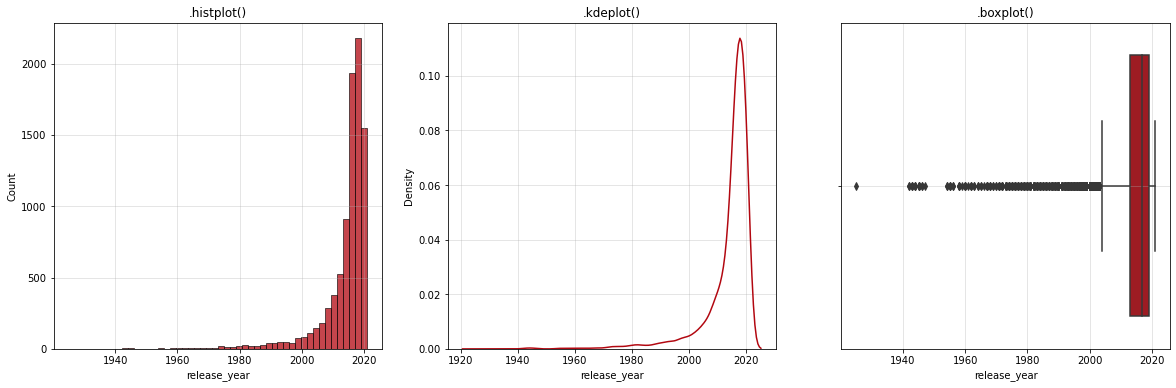

In [25]:
# Create Histogram, KDE, and Box Plots
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,6))

# Histogram Plot
sns.histplot(netflix["release_year"], ax=ax[0], bins=50, color="#b20710")
ax[0].set_title('.histplot()')
ax[0].grid(True, alpha=0.4)

# Kernel Density Estimate Plot
sns.kdeplot(netflix["release_year"], ax=ax[1], color="#b20710")
ax[1].set_title('.kdeplot()')
ax[1].grid(True, alpha=0.4)

# Box Plot
sns.boxplot(netflix["release_year"], ax=ax[2], color="#b20710")
ax[2].set_title('.boxplot()')
ax[2].grid(True, alpha=0.4)

#Display Plots.
plt.show()

**Findings**

- The most common release year for Netflix Content is 2018.
- The oldest movies were released in 1942 with the majority of the movies released in the 1940s related to Documentaries about war.
- The oldest TV shows were released in 1925, 1945, and 1946 but there is a large gap of no TV Shows from the 1950s.

In [26]:
# 3d. What are the most common ratings for Movies and TV Shows?

# Create rating order for lowest to highest rating.
rating_order =  ['TV-Y', 'TV-G', 'TV-Y7', 'TV-PG', 'TV-14', 'TV-MA', 'NR']

netflix["rating"].value_counts()[rating_order]

TV-Y      307
TV-G      262
TV-Y7     340
TV-PG    1151
TV-14    2652
TV-MA    4012
NR         83
Name: rating, dtype: int64

In [46]:
# Create Heatmap for Amount of Movie Content by Ratings.
movieratings = netflix[netflix['type'] == 'Movie'].groupby('type').rating.value_counts().to_frame()
movieratings.columns = ['rating_count']
movieratings.reset_index(drop=False, inplace=True)
movieratings = movieratings.pivot(index='type', columns='rating').rating_count[rating_order]
movieratings.style.background_gradient(cmap='Reds', vmin=0, vmax=200).format("{:.0f}")

rating,TV-Y,TV-G,TV-Y7,TV-PG,TV-14,TV-MA,NR
type,,,,,,,
Movie,131,167,144,828,1918,2865,78


In [47]:
# Create Heatmap for Amount of TV Show Content by Ratings.
tvratings = netflix[netflix['type'] == 'TV Show'].groupby('type').rating.value_counts().to_frame()
tvratings.columns = ['rating_count']
tvratings.reset_index(drop=False, inplace=True)
tvratings = tvratings.pivot(index='type', columns='rating').rating_count[rating_order]
tvratings.style.background_gradient(cmap='Reds', vmin=0, vmax=200).format("{:.0f}")

rating,TV-Y,TV-G,TV-Y7,TV-PG,TV-14,TV-MA,NR
type,,,,,,,
TV Show,176,95,196,323,734,1147,5


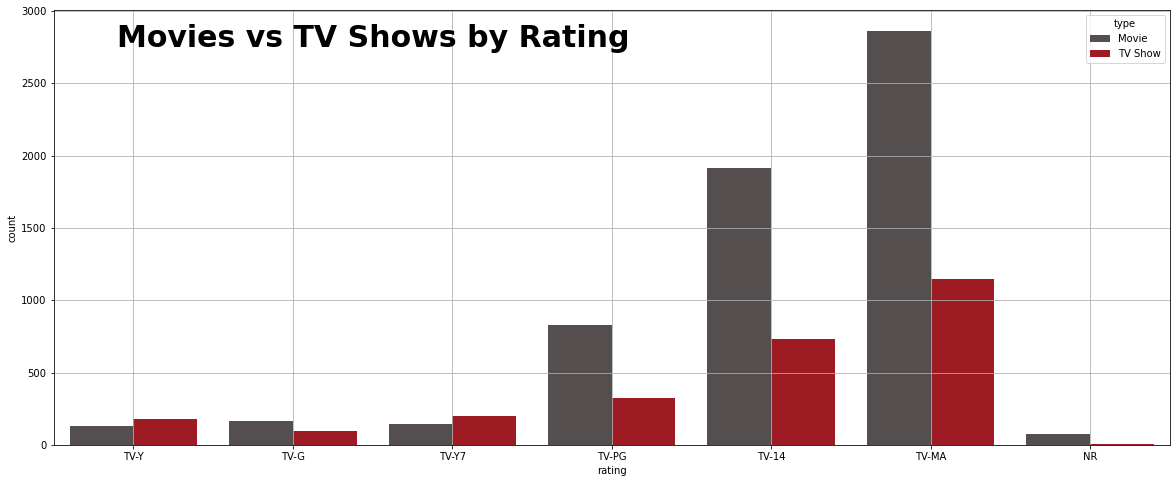

In [53]:
# Movies vs TV Shows grouped by rating.

# Count Amount of each Rating type that keeps with the Rating Order.
movie_rating = net_movie['rating'].value_counts()[rating_order]
tv_rating = net_tv['rating'].value_counts()[rating_order]

# Create Plots
plt.figure(figsize = (20,8))
sns.countplot(x='rating',data = netflix,hue='type', order= rating_order, palette=["#564d4d", "#b20710"])
plt.text(-0.1, 2750, 'Movies vs TV Shows by Rating', size=30, color='black', weight='semibold')
plt.grid()

# Display Plots
plt.show()

In [52]:
# Create Heatmap for Amount of Netflix Content Added by Year grouped by Ratings
yearratings = netflix[netflix.date_added_year >= 1].groupby('date_added_year').rating.value_counts().to_frame()
yearratings.columns = ['rating_count']
yearratings.reset_index(drop=False, inplace=True)
yearratings = yearratings.pivot(index='date_added_year', columns='rating').rating_count[rating_order]
yearratings.style.background_gradient(cmap='Reds', vmin=0, vmax=200).format("{:.0f}")

rating,TV-Y,TV-G,TV-Y7,TV-PG,TV-14,TV-MA,NR
date_added_year,,,,,,,
2001,1,nan,1,2,3,2,1
2008,nan,nan,nan,nan,nan,2,nan
2009,nan,nan,nan,nan,nan,2,nan
2010,nan,nan,nan,nan,nan,nan,1
2011,nan,nan,nan,5,5,3,nan
2012,nan,nan,nan,2,nan,1,nan
2013,nan,1,nan,1,2,3,4
2014,1,2,nan,7,2,12,nan
2015,7,6,6,10,16,32,5


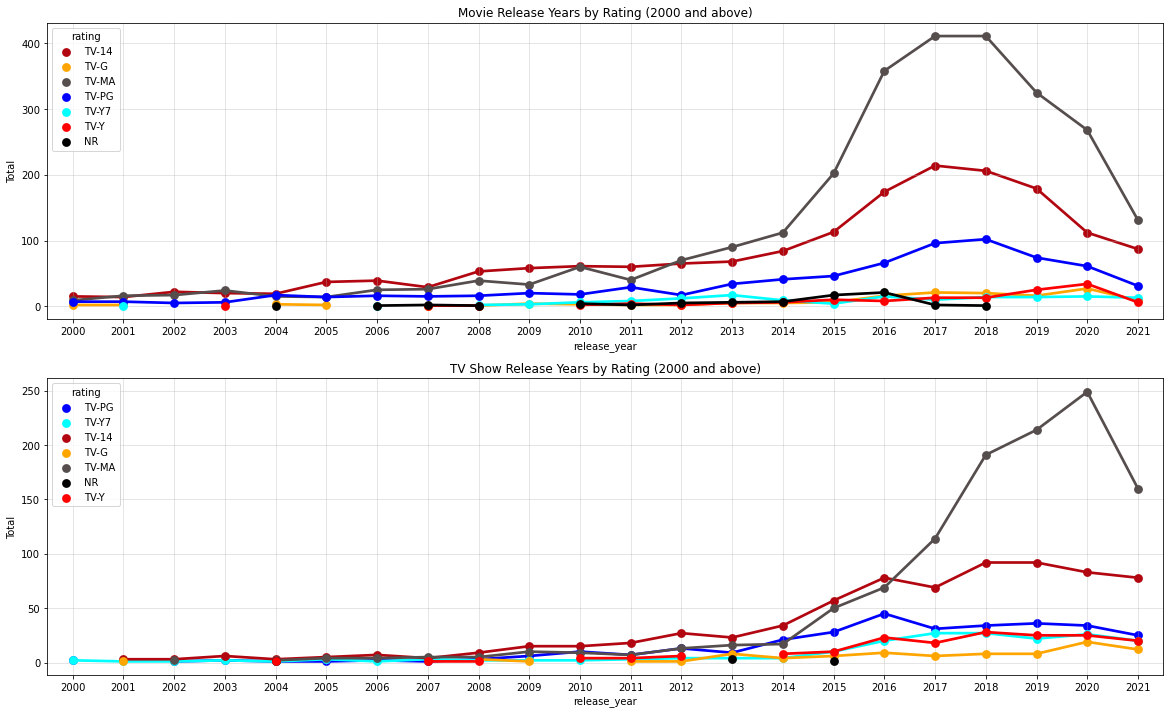

In [42]:
# Release Year by Rating.

# Group Movies by Rating.
movie_releaseyear = net_movie[net_movie['release_year'] >= 2000]
movie_rating_ry = movie_releaseyear.groupby(['release_year','rating']).size().reset_index(name = 'Total')
movie_temp = movie_rating_ry[movie_rating_ry['Total'] >= 1]

# Group TV Shows by Rating.
tv_releaseyear = net_tv[net_tv['release_year']>= 2000]
tv_rating_ry = tv_releaseyear.groupby(['release_year','rating']).size().reset_index(name = 'Total')
tv_temp = tv_rating_ry[tv_rating_ry['Total'] >= 1]

# Create Plots
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(20,12))

sns.pointplot(data = movie_temp,ax=ax[0], x = 'release_year', y = 'Total',hue = 'rating', 
    # Keep Color Palette the same for both plots.
    palette = {'TV-Y':'Red', 'TV-G':'Orange', 'TV-Y7':'Cyan','TV-PG':'Blue', 'TV-14':'#b20710', 'TV-MA':'#564d4d', 'NR':'Black'})
ax[0].set_title('Movie Release Years by Rating (2000 and above)')
ax[0].grid(True, alpha=0.4)

sns.pointplot(data = tv_temp,ax=ax[1], x = 'release_year', y = 'Total',hue = 'rating',
    # Keep Color Palette the same for both plots.
    palette={'TV-Y':'Red', 'TV-G':'Orange', 'TV-Y7':'Cyan','TV-PG':'Blue', 'TV-14':'#b20710', 'TV-MA':'#564d4d', 'NR':'Black'})
ax[1].set_title('TV Show Release Years by Rating (2000 and above)')
ax[1].grid(True, alpha=0.4)

#Display Plots
plt.show()

**Findings**

- In both Movies and TV Shows, the TV-MA rating followed by the TV-14 rating are the most common ratings.
- There are more TV-MA Netflix Content than the lowest four(4) ratings combined.
- Movies: 2012 was the year that TV-MA ratings surpassed TV-14 ratings.
- TV Shows: 2016 was the year that TV-MA ratings surpassed TV-14 ratings.
- There are more TV Shows than Movies in the lower ratings marketed for children.
- There are more Movies than TV Shows in higher ratings marketed for young adults and adults starting with TV-PG ratings.

In [32]:
# 3e. What are the longest durations for Movies and TV Shows?

# Remove 'min' for Movies and 'season(s)' for TV Shows and convert value into integer.
net_movie['duration_int'] = net_movie['duration'].apply(lambda x: int(x.split(' ')[0]))
net_tv['duration_int'] = net_tv['duration'].apply(lambda x: int(x.split(' ')[0]))

# Sort values from highest to smallest.
longmovie = net_movie.sort_values("duration_int", ascending = False)
longtv = net_tv.sort_values("duration_int", ascending = False)

# Count Amount of Movies vs TV Shows of each duration.
movie_durations = pd.to_numeric(net_movie['duration_int'])
TV_seasons = pd.to_numeric(net_tv['duration_int'])

# Display top 15 of each type.
display(longmovie[['title', 'duration', 'listed_in', 'rating']][:15], longtv[['title', 'duration', 'listed_in', 'rating']][:15])

,title,duration,listed_in,rating
4253,Black Mirror: Bandersnatch,312 min,"Dramas, International Movies, Sci-Fi & Fantasy",TV-MA
717,Headspace: Unwind Your Mind,273 min,Documentaries,TV-G
2491,The School of Mischief,253 min,"Comedies, Dramas, International Movies",TV-14
2487,No Longer kids,237 min,"Comedies, Dramas, International Movies",TV-14
2484,Lock Your Girls In,233 min,"Comedies, International Movies, Romantic Movies",TV-PG
2488,Raya and Sakina,230 min,"Comedies, Dramas, International Movies",TV-14
166,Once Upon a Time in America,229 min,"Classic Movies, Dramas",TV-MA
7932,Sangam,228 min,"Classic Movies, Dramas, International Movies",TV-14
1019,Lagaan,224 min,"Dramas, International Movies, Music & Musicals",TV-PG
4573,Jodhaa Akbar,214 min,"Action & Adventure, Dramas, International Movies",TV-14


,title,duration,listed_in,rating
548,Grey's Anatomy,17 Seasons,"Romantic TV Shows, TV Dramas",TV-14
2423,Supernatural,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H...",TV-14
4798,NCIS,15 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",TV-14
1354,Heartland,13 Seasons,TV Dramas,TV-14
4220,COMEDIANS of the world,13 Seasons,"Stand-Up Comedy & Talk Shows, TV Comedies",TV-MA
7847,Red vs. Blue,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",NR
4964,Trailer Park Boys,12 Seasons,"Classic & Cult TV, Crime TV Shows, Internation...",TV-MA
5412,Criminal Minds,12 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",TV-14
6795,Frasier,11 Seasons,"Classic & Cult TV, TV Comedies",TV-PG
6456,Cheers,11 Seasons,"Classic & Cult TV, TV Comedies",TV-PG


In [33]:
# What are the most common Movie Durations and Amount of TV Show Seasons?

# Count Amount of each duration.
movie_durations_count = pd.DataFrame(net_movie['duration_int'].value_counts())
TV_seasons_count = pd.DataFrame(net_tv['duration_int'].value_counts())

# Display top 15 of each type.
display(movie_durations_count[['duration_int']][0:15], TV_seasons_count[['duration_int']][:15])

,duration_int
90,152
94,146
97,146
93,146
91,144
95,137
96,130
92,129
102,122
98,120


,duration_int
1,1793
2,425
3,199
4,95
5,65
6,33
7,23
8,17
9,9
10,7


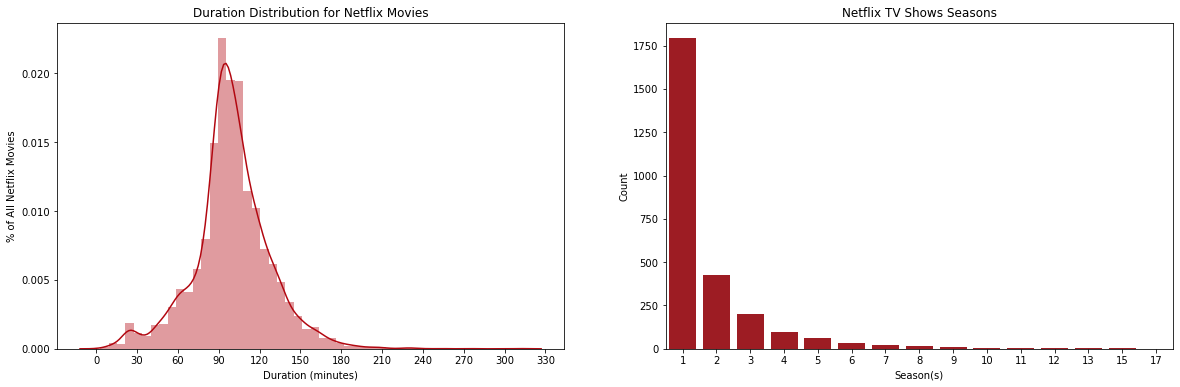

In [34]:
# Create charts to show Movie Durations and TV Show Seasons.

fig, ax = plt.subplots(1,2, figsize=(20, 6))

# Movies
ax1 = sns.distplot(movie_durations, ax=ax[0], color="#b20710");
ax1.set_xticks(np.arange(0,360,30))
ax1.set_title("Duration Distribution for Netflix Movies")
ax1.set_ylabel("% of All Netflix Movies")
ax1.set_xlabel("Duration (minutes)")

# TV Shows
ax2 = sns.countplot(TV_seasons, ax=ax[1], color="#b20710");
ax2.set_title("Netflix TV Shows Seasons")
ax2.set_ylabel("Count")
ax2.set_xlabel("Season(s)")

#Display Plots
plt.show()

**Findings**

- The longest Movie is Black Mirror: Bandersnatch at 312 min and the top 15 longest Movies are all over 200 min.
- The longest TV Show is Grey's Anatomy with 17 Seasons and the top 15 longest TV Shows are all 10 Seasons or above.
- The most common duration for Movies is 90 minutes  with the duration range staying close to the 90 minute mark.
- The most common duration for TV Shows is 1 Season.  Many TV Shows do not make it after the Pilot Season.
- The most common genres for longest Movies are related to International Dramas.
- The most common genres for longest running TV Shows are related to Comedy then Drama.

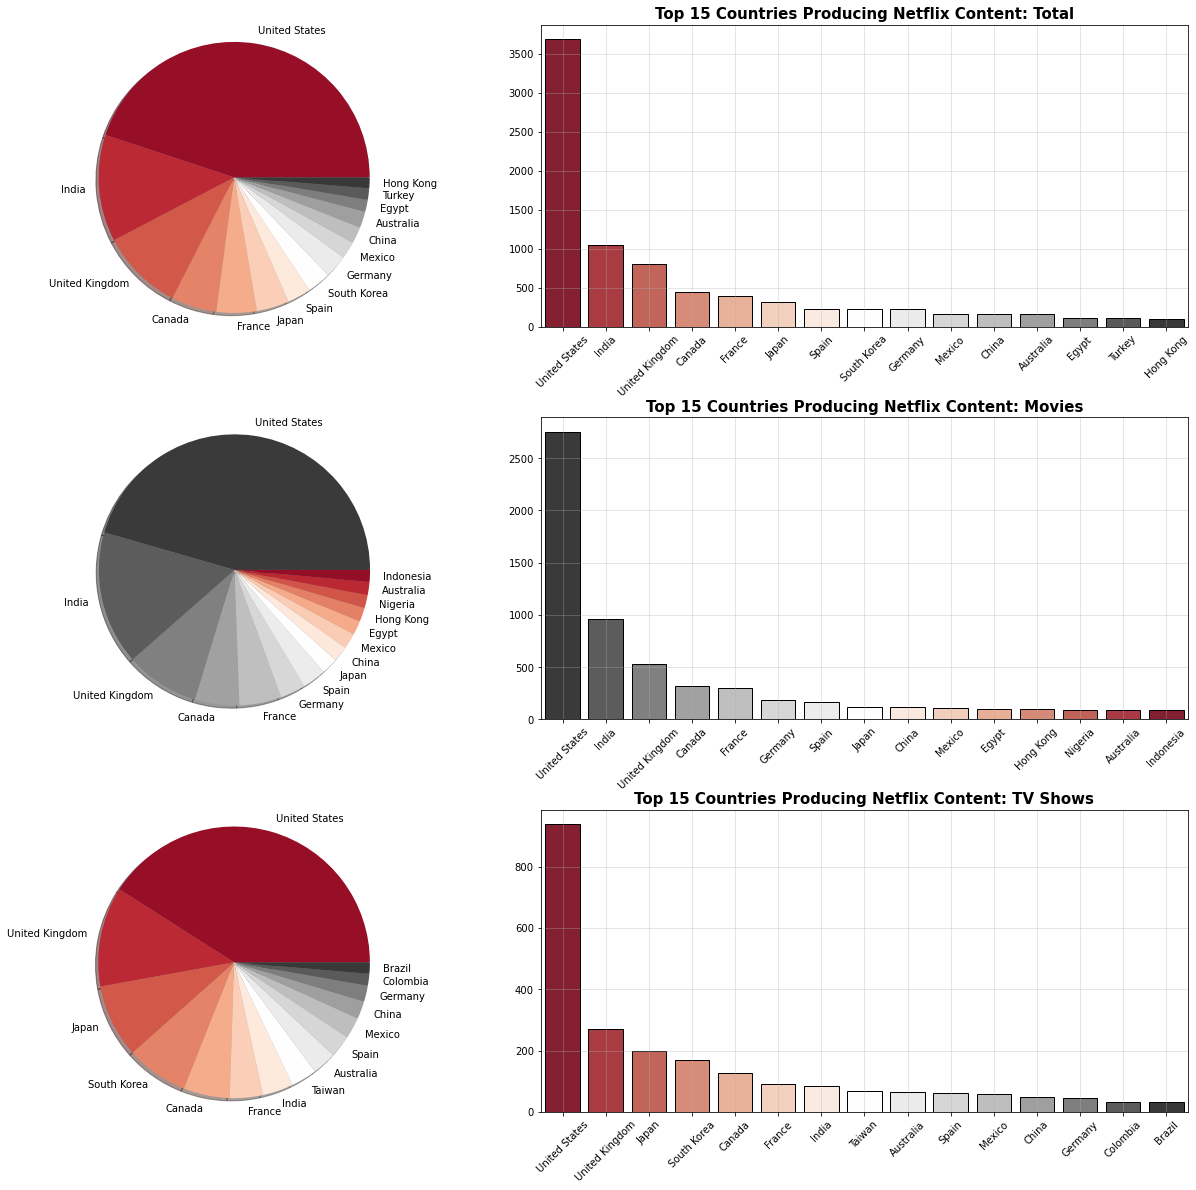

In [35]:
# 3f. What are the most common countries creating Movies and TV Shows?

# Create separate variables to display Movies, TV Shows, and Total
net_country = netflix['country']
net_country_counting = pd.Series(dict(Counter(','.join(net_country).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
net_country_counting.drop(['No Data'], axis=0, inplace=True)

movie_country = net_movie['country']
movie_country_counting = pd.Series(dict(Counter(','.join(movie_country).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
movie_country_counting.drop(['No Data'], axis=0, inplace=True)

tv_country = net_tv['country']
tv_country_counting = pd.Series(dict(Counter(','.join(tv_country).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
tv_country_counting.drop(['No Data'], axis=0, inplace=True)

net_country_top15 = net_country_counting[:15]
movie_country_top15 = movie_country_counting[:15]
tv_country_top15 = tv_country_counting[:15]

# Create Plots
fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(nrows=3, ncols=2,
                       #height_ratios=[1,1,1],
                       width_ratios=[4,8],
                       wspace=0.3, 
                       hspace=0.3)

ax1 = plt.subplot(gs[0,0])
ax1.pie(net_country_top15, labels=net_country_top15.index, shadow=True, startangle=0, colors=sns.color_palette("RdGy", n_colors=15))
ax1.axis('equal')

ax2 = plt.subplot(gs[0,1])
sns.barplot(net_country_top15.index, net_country_top15, ax=ax2, palette="RdGy", edgecolor = 'black')
ax2.set_xticklabels(net_country_top15.index, rotation='45')
ax2.set_title('Top 15 Countries Producing Netflix Content: Total', fontsize=15, fontweight='bold')
ax2.grid(True, alpha=0.4)

ax3 = plt.subplot(gs[1,0])
ax3.pie(movie_country_top15, labels=movie_country_top15.index, shadow=True, startangle=0, colors=sns.color_palette("RdGy_r", n_colors=15))
ax3.axis('equal')

ax4 = plt.subplot(gs[1,1])
sns.barplot(movie_country_top15.index, movie_country_top15, ax=ax4, palette="RdGy_r", edgecolor = 'black')
ax4.set_xticklabels(movie_country_top15.index, rotation='45')
ax4.set_title('Top 15 Countries Producing Netflix Content: Movies', fontsize=15, fontweight='bold')
ax4.grid(True, alpha=0.4)

ax5 = plt.subplot(gs[2,0])
ax5.pie(tv_country_top15, labels=tv_country_top15.index, shadow=True, startangle=0, colors=sns.color_palette("RdGy", n_colors=15))
ax5.axis('equal')

ax6 = plt.subplot(gs[2,1])
sns.barplot(tv_country_top15.index, tv_country_top15, ax=ax6, palette="RdGy", edgecolor = 'black')
ax6.set_xticklabels(tv_country_top15.index, rotation='45')
ax6.set_title('Top 15 Countries Producing Netflix Content: TV Shows', fontsize=15, fontweight='bold')
ax6.grid(True, alpha=0.4)

#Display Plots
plt.show()

**Findings**

- The United States produces the most Netflix content both Movies and TV Shows.  Hollywood.
- India produces the 2nd most Netflix content but focuses more on Movie content.  Bollywood.
- Eastern Asian countries (Japan, South Korea, Taiwan, etc) produce more TV Shows than Movies.

In [36]:
# 3g. What are the most common genres of Movies and TV Shows?

# Separate multiple values in a single cell and count amount of each genre.
listed_in_data = netflix['listed_in']
listed_in_counting = pd.Series(dict(Counter(','.join(listed_in_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)

movie_listed_in_data = net_movie['listed_in']
movie_listed_in_counting = pd.Series(dict(Counter(','.join(movie_listed_in_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)

tv_listed_in_data = net_tv['listed_in']
tv_listed_in_counting = pd.Series(dict(Counter(','.join(tv_listed_in_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)

# Create table that only shows the top 15 most common genres in each type.
listed_in_top15 = listed_in_counting[:15]
movie_listed_in_top15 = movie_listed_in_counting[:15]
tv_listed_in_top15 = tv_listed_in_counting[:15]

# Display Top 15 Genres for each type: Total, Movies, and TV Shows.
display(listed_in_top15, movie_listed_in_top15, tv_listed_in_top15)


International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
dtype: int64

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
dtype: int64

International TV Shows       1351
TV Dramas                     763
TV Comedies                   581
Crime TV Shows                470
Kids' TV                      451
Docuseries                    395
Romantic TV Shows             370
Reality TV                    255
British TV Shows              253
Anime Series                  176
Spanish-Language TV Shows     174
TV Action & Adventure         168
Korean TV Shows               151
TV Mysteries                   98
Science & Nature TV            92
dtype: int64

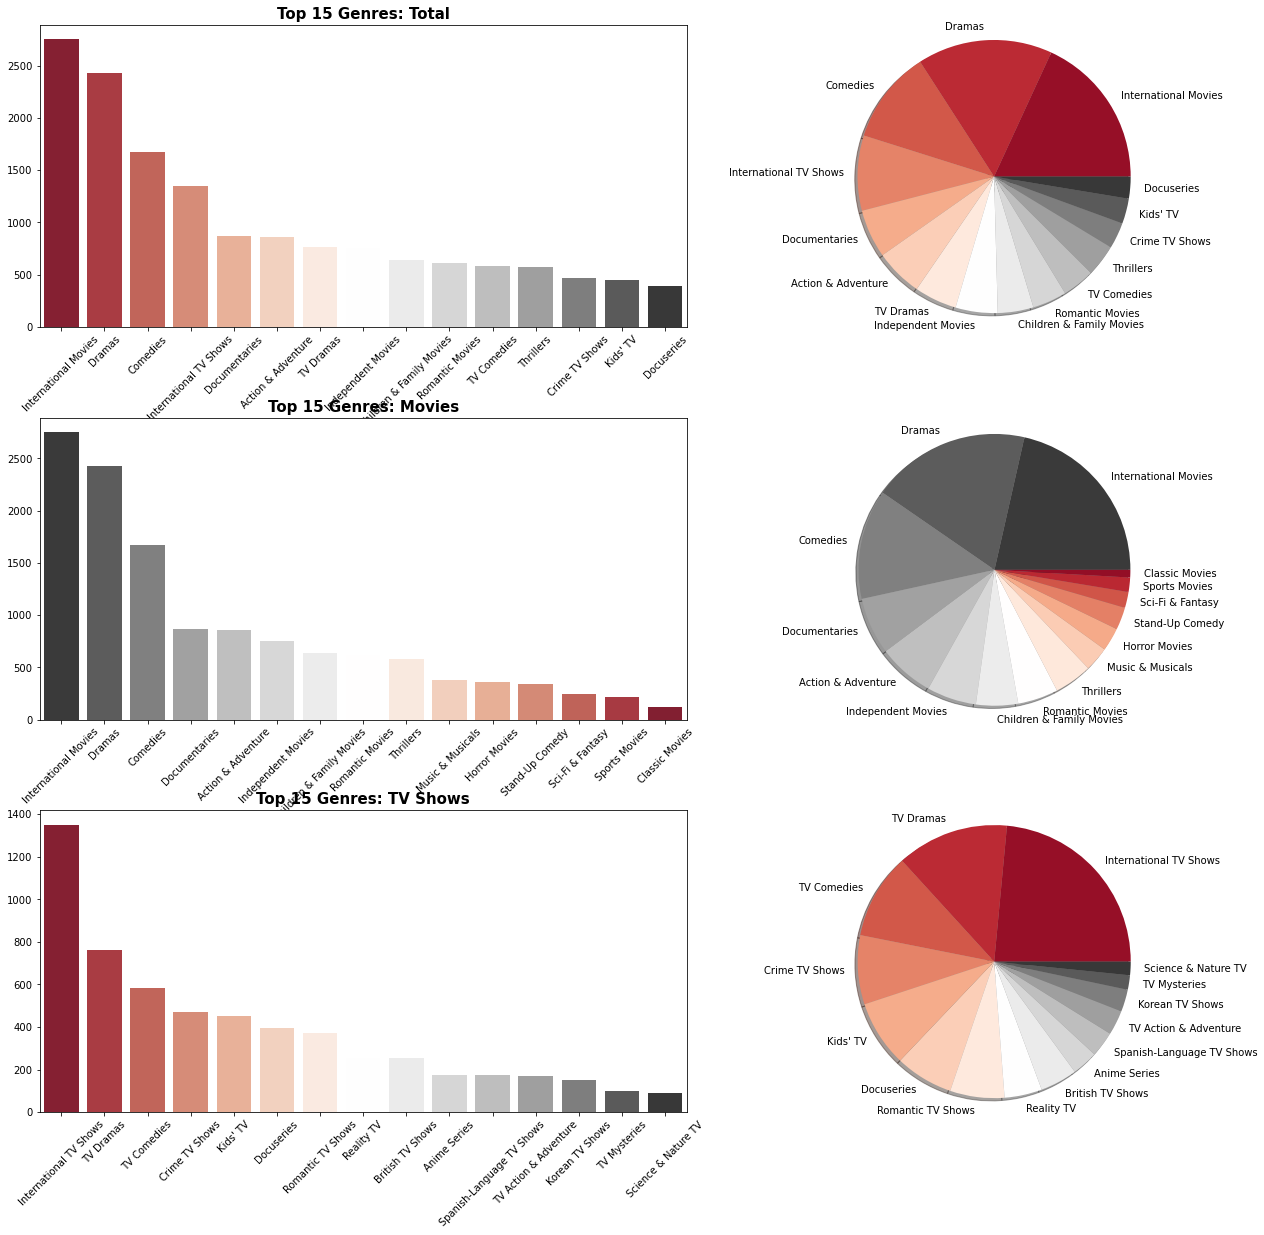

In [37]:
# Create Plots

fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(nrows=3, ncols=2,
                       #height_ratios=[1,1,1],
                       width_ratios=[8,4],
                       wspace=0.3, 
                       hspace=0.3)

ax1 = plt.subplot(gs[0,0])
sns.barplot(listed_in_top15.index, listed_in_top15, ax=ax1, palette="RdGy")
ax1.set_xticklabels(listed_in_top15.index, rotation='45')
ax1.set_title('Top 15 Genres: Total', fontsize=15, fontweight='bold')

ax2 = plt.subplot(gs[0,1])
ax2.pie(listed_in_top15, labels=listed_in_top15.index,
        shadow=True, startangle=0, colors=sns.color_palette("RdGy", n_colors=15))
ax2.axis('equal')

ax3 = plt.subplot(gs[1,0])
sns.barplot(movie_listed_in_top15.index, movie_listed_in_top15, ax=ax3, palette="RdGy_r")
ax3.set_xticklabels(movie_listed_in_top15.index, rotation='45')
ax3.set_title('Top 15 Genres: Movies', fontsize=15, fontweight='bold')

ax4 = plt.subplot(gs[1,1])
ax4.pie(movie_listed_in_top15, labels=movie_listed_in_top15.index,
        shadow=True, startangle=0, colors=sns.color_palette("RdGy_r", n_colors=15))
ax4.axis('equal')

ax5 = plt.subplot(gs[2,0])
sns.barplot(tv_listed_in_top15.index, tv_listed_in_top15, ax=ax5, palette="RdGy")
ax5.set_xticklabels(tv_listed_in_top15.index, rotation='45')
ax5.set_title('Top 15 Genres: TV Shows', fontsize=15, fontweight='bold')

ax6 = plt.subplot(gs[2,1])
ax6.pie(tv_listed_in_top15, labels=tv_listed_in_top15.index,
        shadow=True, startangle=0, colors=sns.color_palette("RdGy", n_colors=15))
ax6.axis('equal')

# Display Plots
plt.show()

**Findings**

- The top 3 Genres for both Movies and TV Shows are International, Drama, and Comedy.
- The next 3 Genres in Movies are Documentaries, Action & Adventure, and Independent.
- The next 3 Genres in TV Shows are Crime, Kids, and Docuseries.

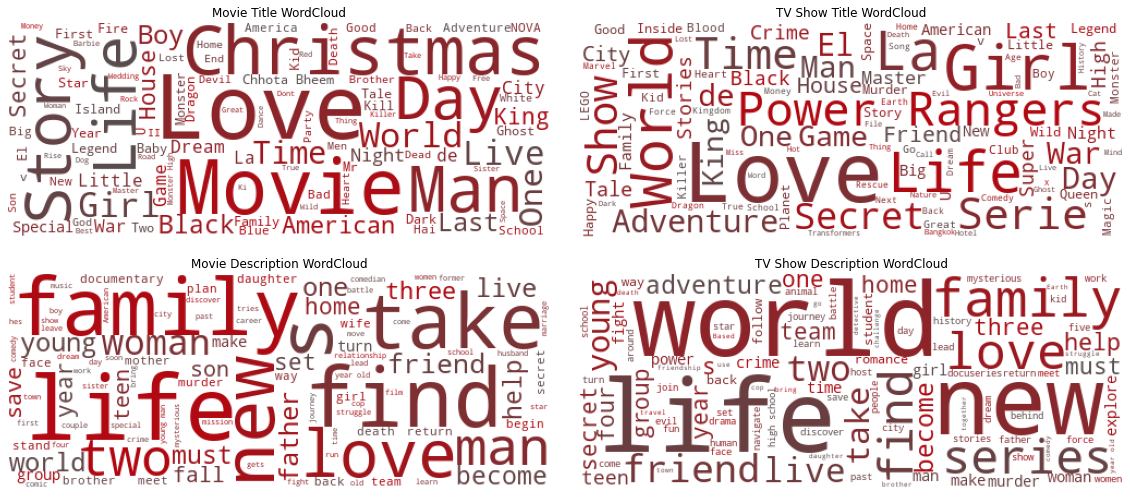

In [38]:
# 3h. What are the most common plots/themes of Movies and TV Shows?

from wordcloud import WordCloud

# Custom colour map based on Netflix palette
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ['#564d4d', '#b20710'])

# Create String Lists for Titles and Description removing all unneccessary characters.
movie_title = str(list(net_movie['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
tv_title = str(list(net_tv['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
movie_description = str(list(net_movie['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
tv_description = str(list(net_tv['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

# Create Values for WordClouds
movie_title_word = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 100).generate(movie_title)
tv_title_word = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 100).generate(tv_title)
movie_description_word = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 100).generate(movie_description)
tv_description_word = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 100).generate(tv_description)

# Create Subplots
fig = plt.figure(figsize=(20, 9))
gs = gridspec.GridSpec(nrows=2, ncols=2,
                       wspace=0.05, 
                       hspace=0.05)

ax1 = plt.subplot(gs[0,0])
ax1 = plt.imshow(movie_title_word)
ax1 = plt.axis("off")
ax1 = plt.title("Movie Title WordCloud")

ax2 = plt.subplot(gs[0,1])
ax2 = plt.imshow(tv_title_word)
ax2 = plt.axis("off")
ax2 = plt.title("TV Show Title WordCloud")

ax3 = plt.subplot(gs[1,0])
ax3 = plt.imshow(movie_description_word)
ax3 = plt.axis("off")
ax3 = plt.title("Movie Description WordCloud")

ax4 = plt.subplot(gs[1,1])
ax4 = plt.imshow(tv_description_word)
ax4 = plt.axis("off")
ax4 = plt.title("TV Show Description WordCloud")

# Display WordClouds
plt.show()

**Findings**

- Love, Live, Life, Family, Friend, and World are all common words used in Titles and Descriptions.
- A common word in Movie Titles is 'Christmas'.
- A common word in TV Show Titles is 'Girl'.
- A common word in both Movie and TV Show Descriptions is 'New'.

### **Overall Findings**

3a. Netflix Content: Movies vs TV Shows
- Netflix content consists of more than 2X the amount of Movies than TV Shows.

3b. What are the most common dates Movies and TV Shows are added to Netflix?
- The year 0001 is originally the NULL data but it is accounted for in the heatmap.
- Friday is the most popular day of the week for Netflix to add new content with Monday being the least popular day.
- The 1st of the month is overwhelmingly the most popular monthday to release new content with the 15th being the second most popular.
- July (for the summer) and December (for the winter) are the two most popular months to add new content.
- Netflix added the most content in Year 2019 with November 2019 being the month with the most content added for that year.

3c. What are the most common release year of Movies and TV Shows?
- The most common release year for Netflix Content is 2018.
- The oldest movies were released in 1942 with the majority of the movies released in the 1940s related to Documentaries about war.
- The oldest TV shows were released in 1925, 1945, and 1946 but there is a large gap of no TV Shows from the 1950s.

3d. What are the most common ratings for Movies and TV Shows?
- In both Movies and TV Shows, the TV-MA rating followed by the TV-14 rating are the most common ratings.
- There are more TV-MA Netflix Content than the lowest four(4) ratings combined.
- Movies: 2012 was the year that TV-MA ratings surpassed TV-14 ratings.
- TV Shows: 2016 was the year that TV-MA ratings surpassed TV-14 ratings.
- There are more TV Shows than Movies in the lower ratings marketed for children.
- There are more Movies than TV Shows in higher ratings marketed for young adults and adults starting with TV-PG ratings.

3e. What are the longest durations for Movies and TV Shows?
- The longest Movie is Black Mirror: Bandersnatch at 312 min and the top 15 longest Movies are all over 200 min.
- The longest TV Show is Grey's Anatomy with 17 Seasons and the top 15 longest TV Shows are all 10 Seasons or above.
- The most common duration for Movies is 90 minutes  with the duration range staying close to the 90 minute mark.
- The most common duration for TV Shows is 1 Season.  Many TV Shows do not make it after the Pilot Season.
- The most common genres for longest Movies are related to International Dramas.
- The most common genres for longest running TV Shows are related to Comedy then Drama.

3f. What are the most common countries creating Movies and TV Shows?
- The United States produces the most Netflix content both Movies and TV Shows.  Hollywood.
- India produces the 2nd most Netflix content but focuses more on Movie content.  Bollywood.
- Eastern Asian countries (Japan, South Korea, Taiwan, etc) produce more TV Shows than Movies.

3g. What are the most common genres of Movies and TV Shows?
- The top 3 Genres for both Movies and TV Shows are International, Drama, and Comedy.
- The next 3 Genres in Movies are Documentaries, Action & Adventure, and Independent.
- The next 3 Genres in TV Shows are Crime, Kids, and Docuseries.

3h. What are the most common plots/themes of Movies and TV Shows?
- Love, Live, Life, Family, Friend, and World are all common words used in Titles and Descriptions.
- A common word in Movie Titles is 'Christmas'.
- A common word in TV Show Titles is 'Girl'.
- A common word in both Movie and TV Show Descriptions is 'New'.

## 4. Conclusion

Taking into consideration the findings from this Netflix EDA, I would like to propose the next big TV Show hit.  The title of the show will be "Where there is a Will, there is a Wei" with the show categorized as an International Dramatic Comedy (Dramedy).  The Wei family (consisting of father, mother, daughter, and son) relocates to the United States (or United Kingdom) due to job opportunities for both father Wei and mother Wei.  All four members of the family gain friends through work, school, neighborhood, and community but all the friends they make are coincidentally named variations of 'Will' such as William, Wilson, Willow, Wilma, Wilbert, Willis, Wilfred, Anwil, Hartwil, Maxwil, Tawil, etc.  Each 'Will' comes from a different cultural background and exposes the Wei family to different customs, beliefs, and traditions like food, clothing, and celebration of major events/holidays. <br>

Six seasons and a movie. Thank you for attending to my TED Talk. I appreciate having your time and attention. Autographs will be signed in the lobby until Thursday. 1 for $10, 2 for $25. <br>